/Users/nickvazz/Desktop/virtualenvs/3MLenv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/nickvazz/Desktop/virtualenvs/3MLenv/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


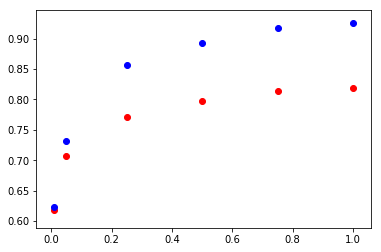

('conservative', 2.860859023236995)
('conservatives', 2.5098539172078795)
('republican', 1.8509136258702257)
('right', 1.6780076442207283)
('liberty', 1.5355089449663655)
('hispanic', 1.5074401922178273)
('freedom', 1.4597264301777204)
('restore', 1.4118723874624541)
('empower', 1.399049181847881)
('growth', 1.3350455968802064)
('softer', 1.2823415736041845)
('keep', 1.2482338223972609)
('out', 1.2469991701716443)
('arizonans', 1.239989305474593)
('patriots', 1.2192887757342263)
('republicans', 1.193252504956863)
('winning', 1.1589134626885573)
('super', 1.1409793832591801)
('grow', 1.1372220558778312)
('main', 1.112859411854532)
('love', 1.098964275294144)
('commerce', 1.0946078226736433)
('customers', 1.0697876282169008)
('engage', 1.066366735849362)
('chamber', 1.0533282620634052)
----------
('progress', -2.818679450533787)
('blue', -2.4891911129147033)
('progressive', -2.425767157142416)
('democratic', -2.143467952090294)
('environment', -1.801027496431245)
('forward', -1.800427883

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import numpy as np

jointFund = !ls PoliticalFinancialData/J*
superPacs = !ls PoliticalFinancialData/S*

df_s = []
for s in superPacs:
    year = s.split('-')[-1].replace('.xlsx','')
    df = pd.read_excel(s)
    df['year'] = year
    df_s.append(df)
    
df_j = []
for j in jointFund:
    year = j.split('-')[-1].replace('.xlsx','')
    df = pd.read_excel(j)
    df['year'] = year
    df_j.append(df)
    
df_s = pd.concat(df_s)
df_j = pd.concat(df_j)

df_s = df_s.loc[df_s['Viewpoint'].isin(['Conservative','Liberal'])]
df_j = df_j.loc[df_j['Party'].isin(['R','D'])]

df_s = df_s.reset_index().dropna(subset=['Viewpoint'])
df_j = df_j.reset_index().dropna(subset=['Party'])

df_s.replace({'Conservative':'R', 'Liberal':'D'}, inplace=True)

df_s = df_s.drop('index', axis=1)
df_j = df_j.drop('index', axis=1)

replace_punc = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")

names = df_s['Group']
names.append(df_j['Committee'])
names = names.apply(lambda x: x.lower())
names = names.apply(lambda x: replace_punc.sub("", x))

cv = CountVectorizer(binary=True)
cv.fit(names)

X = cv.transform(names)

stance = df_s['Viewpoint']
stance.append(df_j['Party'])

y = label_binarize(stance.values, classes=['D','R'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1.0]:
    clf = LogisticRegression(C=c)
#     clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    
    a = accuracy_score(y_test, clf.predict(X_test))
    b = accuracy_score(y_train, clf.predict(X_train))
    plt.scatter(c,a,color='r')
    plt.scatter(c,b,color='b')
plt.show()

feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), clf.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:25]:
    print (best_positive)
    
print ('-'*10)
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:25]:
    print (best_negative)

In [ ]:
bigram_vectorizer = CountVectorizer(ngram_range=(2,2), token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams are cool!')


